In [4]:
import torch
from torch import nn
from torch.nn import functional as F
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_tensor_type(torch.BFloat16Tensor)

c:\Users\micha\miniconda3\envs\H2O\lib\site-packages\torch\__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ..\torch\csrc\tensor\python_tensor.cpp:453.)
  _C._set_default_tensor_type(t)


In [15]:
def plot_two_lists(list1, list2, label1="List 1", label2="List 2"):
    if not list1 and not list2:
        print("Both lists are empty. Please provide valid lists.")
        return

    # Plot the first list if it exists
    if list1:
        x_values1 = range(len(list1))
        plt.plot(x_values1, list1, marker='o', label=label1, color='blue')

    # Plot the second list if it exists
    if list2:
        x_values2 = range(len(list2))
        plt.plot(x_values2, list2, marker='x', label=label2, color='orange')

    # Add titles and labels
    plt.title("Line Plot for Two Lists")
    plt.xlabel("Position (Index)")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()  # Add legend to distinguish the lines

    # Show the plot
    plt.show()


In [6]:
def cumulative_sum(lst):
    cumulative = []
    total = 0
    for value in lst:
        total += value
        cumulative.append(total)
    return cumulative

In [7]:
token_times_kv_cache = [0.11601948738098145,
                  0.02714705467224121,
                  0.017220497131347656,
                  0.016626596450805664,
                  0.016840219497680664,
                  0.016420841217041016,
                  0.016364097595214844,
                  0.017104148864746094,
                  0.016820192337036133,
                  0.01717376708984375,
                  0.01634383201599121,
                  0.01609492301940918,
                  0.016725540161132812,
                  0.01610422134399414,
                  0.016451597213745117,
                  0.01688075065612793,
                  0.015510082244873047,
                  0.016103267669677734,
                  0.015666723251342773,
                  0.01671004295349121,
                  0.01625680923461914,
                  0.016074419021606445,
                  0.015803813934326172,
                  0.015330314636230469,
                  0.024332761764526367,
                  0.018785953521728516,
                  0.02190566062927246,
                  0.0212099552154541,
                  0.020694971084594727,
                  0.02191162109375,
                  0.02225661277770996,
                  0.02172398567199707,
                  0.022060632705688477,
                  0.021233320236206055,
                  0.02069878578186035,
                  0.02151322364807129,
                  0.017733335494995117,
                  0.016856908798217773,
                  0.017101526260375977,
                  0.015676498413085938,
                  0.01600956916809082,
                  0.016682863235473633,
                  0.016261816024780273,
                  0.016675233840942383,
                  0.01662755012512207,
                  0.02545928955078125,
                  0.02453136444091797,
                  0.026305675506591797,
                  0.01652240753173828,
                  0.022896528244018555,
                  0.016910314559936523,
                  0.021992921829223633,
                  0.02263665199279785,
                  0.02384328842163086,
                  0.02198481559753418,
                  0.022013425827026367,
                  0.02192521095275879,
                  0.022222042083740234,
                  0.02375173568725586,
                  0.02318572998046875,
                  0.0240323543548584,
                  0.01991868019104004,
                  0.01685786247253418,
                  0.016540050506591797,
                  0.02147960662841797,
                  0.022576332092285156,
                  0.0208437442779541,
                  0.016632080078125,
                  0.0197756290435791,
                  0.022003173828125,
                  0.022990942001342773,
                  0.02315211296081543,
                  0.023021697998046875,
                  0.02179121971130371,
                  0.01804375648498535,
                  0.017951011657714844,
                  0.02021169662475586,
                  0.021764278411865234,
                  0.022073030471801758,
                  0.021877288818359375,
                  0.022704124450683594,
                  0.02128887176513672,
                  0.017774105072021484,
                  0.02173304557800293,
                  0.02193427085876465,
                  0.019463777542114258,
                  0.018163442611694336,
                  0.017975568771362305,
                  0.016547679901123047,
                  0.019201040267944336,
                  0.022811174392700195,
                  0.021806955337524414,
                  0.021970272064208984,
                  0.017073631286621094,
                  0.020277738571166992,
                  0.021918535232543945,
                  0.019488096237182617,
                  0.02135634422302246,
                  0.02051520347595215,
                  0.020795106887817383,
                  0.021683931350708008,
                  0.020923614501953125,
                  0.020712614059448242,
                  0.021241188049316406,
                  0.021484375,
                  0.021068334579467773,
                  0.021851778030395508,
                  0.021470308303833008,
                  0.020937442779541016,
                  0.022219419479370117,
                  0.02067255973815918,
                  0.021242618560791016,
                  0.01817917823791504,
                  0.016062498092651367,
                  0.015395641326904297,
                  0.02090907096862793,
                  0.021789073944091797,
                  0.020996809005737305,
                  0.01976609230041504,
                  0.015669822692871094,
                  0.02130746841430664,
                  0.0207216739654541,
                  0.020975828170776367,
                  0.0213010311126709,
                  0.020774126052856445,
                  0.019278764724731445,
                  0.015544652938842773,
                  0.024907588958740234,
                  0.015331506729125977,
                  0.017511606216430664,
                  0.015525579452514648,
                  0.015164613723754883,
                  0.016814470291137695,
                  0.017671585083007812,
                  0.02205681800842285,
                  0.022143840789794922,
                  0.021593809127807617,
                  0.020981550216674805,
                  0.021947383880615234,
                  0.022500038146972656,
                  0.02266073226928711,
                  0.021897554397583008,
                  0.0221402645111084,
                  0.017775535583496094,
                  0.016393661499023438,
                  0.017014741897583008,
                  0.01650381088256836,
                  0.016300678253173828,
                  0.02082681655883789,
                  0.021458148956298828,
                  0.021600723266601562,
                  0.02249312400817871,
                  0.023347139358520508,
                  0.020811796188354492,
                  0.02208399772644043,
                  0.020125150680541992,
                  0.024125337600708008,
                  0.02180647850036621,
                  0.02174663543701172,
                  0.01913762092590332,
                  0.01721024513244629,
                  0.016390323638916016,
                  0.016542434692382812,
                  0.016691207885742188,
                  0.01582026481628418,
                  0.016071796417236328,
                  0.017151594161987305,
                  0.021711111068725586,
                  0.020748376846313477,
                  0.018458843231201172,
                  0.016558408737182617,
                  0.020722627639770508,
                  0.020895004272460938,
                  0.021693944931030273,
                  0.017478227615356445,
                  0.017634868621826172,
                  0.01724529266357422,
                  0.021952390670776367,
                  0.018781185150146484,
                  0.02049112319946289,
                  0.021536588668823242,
                  0.020740985870361328,
                  0.01857590675354004,
                  0.01797032356262207,
                  0.017365694046020508,
                  0.015911102294921875,
                  0.015230178833007812,
                  0.015770912170410156,
                  0.016257047653198242,
                  0.01661968231201172,
                  0.01940321922302246,
                  0.0227816104888916,
                  0.02196359634399414,
                  0.02094411849975586,
                  0.021901369094848633,
                  0.02319645881652832,
                  0.022808313369750977,
                  0.02191329002380371,
                  0.022424936294555664,
                  0.017073869705200195,
                  0.018718719482421875,
                  0.022071361541748047,
                  0.017132997512817383,
                  0.020855426788330078,
                  0.018194913864135742,
                  0.02197861671447754,
                  0.01990222930908203,
                  0.019958972930908203,
                  0.02154850959777832,
                  0.021213769912719727,
                  0.02184748649597168,
                  0.021889925003051758,
                  0.021379947662353516,
                  0.01956486701965332,
                  0.016875028610229492,
                  0.01629018783569336,
                  0.016576051712036133,
                  0.025016307830810547,
                  0.01591205596923828,
                  0.016208648681640625,
                  0.019374370574951172,
                  0.022073984146118164,
                  0.021231889724731445,
                  0.022136926651000977,
                  0.01883864402770996,
                  0.016855955123901367,
                  0.020183324813842773,
                  0.021831989288330078,
                  0.01692366600036621,
                  0.01621723175048828,
                  0.01667022705078125,
                  0.016363143920898438,
                  0.016132354736328125,
                  0.01624131202697754,
                  0.015813589096069336,
                  0.01681804656982422,
                  0.015894651412963867,
                  0.023436307907104492,
                  0.016513586044311523,
                  0.015044212341308594,
                  0.01743769645690918,
                  0.02158665657043457,
                  0.02189779281616211,
                  0.021863460540771484,
                  0.023139238357543945,
                  0.023205995559692383,
                  0.023044824600219727,
                  0.02170276641845703,
                  0.01837301254272461,
                  0.023348093032836914,
                  0.017208576202392578,
                  0.01712656021118164,
                  0.016852378845214844,
                  0.026688098907470703,
                  0.01728677749633789,
                  0.017155170440673828,
                  0.01620769500732422,
                  0.016739845275878906,
                  0.01671457290649414,
                  0.0162813663482666,
                  0.016792774200439453,
                  0.019806623458862305,
                  0.021435260772705078,
                  0.021647930145263672,
                  0.02155613899230957,
                  0.021730422973632812,
                  0.027660608291625977,
                  0.02849555015563965,
                  0.03215527534484863,
                  0.032423973083496094,
                  0.028931379318237305,
                  0.016564369201660156,
                  0.0316469669342041,
                  0.022688627243041992,
                  0.02959895133972168,
                  0.031795501708984375,
                  0.03264951705932617,
                  0.02664637565612793,
                  0.016585350036621094,
                  0.016134023666381836,
                  0.016664981842041016,
                  0.019115209579467773,
                  0.032190561294555664,
                  0.025112152099609375,
                  0.016742467880249023,
                  0.018121719360351562,
                  0.015571355819702148,
                  0.015102386474609375,
                  0.016013383865356445,
                  0.01613759994506836,
                  0.016491174697875977,
                  0.015624761581420898,
                  0.015711307525634766,
                  0.021958351135253906,
                  0.031952857971191406,
                  0.025678157806396484,
                  0.02513432502746582,
                  0.03168463706970215,
                  0.019013404846191406,
                  0.015580415725708008,
                  0.015585899353027344,
                  0.02944040298461914,
                  0.02823042869567871,
                  0.016164064407348633,
                  0.016011714935302734,
                  0.01601386070251465,
                  0.015576601028442383,
                  0.018383026123046875,
                  0.016099214553833008,
                  0.016613006591796875,
                  0.01976633071899414,
                  0.027430057525634766,
                  0.057237863540649414,
                  0.05993795394897461,
                  0.026602506637573242,
                  0.02677297592163086,
                  0.026422977447509766,
                  0.026101350784301758,
                  0.026105880737304688,
                  0.02559828758239746,
                  0.027197599411010742,
                  0.025142908096313477,
                  0.026582717895507812,
                  0.02868032455444336,
                  0.026618003845214844,
                  0.025532007217407227,
                  0.025220394134521484,
                  0.02824711799621582,
                  0.02866053581237793,
                  0.02783370018005371,
                  0.027720928192138672,
                  0.027743816375732422,
                  0.027665138244628906,
                  0.025136709213256836,
                  0.027287006378173828,
                  0.027360916137695312,
                  0.02663898468017578,
                  0.026920080184936523,
                  0.030937910079956055,
                  0.0337061882019043,
                  0.01864910125732422,
                  0.017615079879760742,
                  0.016227245330810547,
                  0.016010761260986328,
                  0.017926931381225586,
                  0.017014026641845703,
                  0.01618480682373047,
                  0.015655517578125,
                  0.01617121696472168,
                  0.016132116317749023,
                  0.016676664352416992,
                  0.01601552963256836,
                  0.01651930809020996,
                  0.0165102481842041]

In [19]:
token_times_no_kv_cache = [0.11322021484375,
                  0.022986412048339844,
                  0.018036365509033203,
                  0.014255046844482422,
                  0.02068305015563965,
                  0.020029067993164062,
                  0.014180183410644531,
                  0.018122196197509766,
                  0.02004218101501465,
                  0.01605963706970215,
                  0.015860795974731445,
                  0.016071319580078125,
                  0.01603245735168457,
                  0.01606130599975586,
                  0.01751255989074707,
                  0.018202543258666992,
                  0.016135692596435547,
                  0.016142845153808594,
                  0.0160214900970459,
                  0.017906904220581055,
                  0.01552581787109375,
                  0.014205217361450195,
                  0.018174171447753906,
                  0.019591808319091797,
                  0.030087709426879883,
                  0.024281024932861328,
                  0.02910017967224121,
                  0.015136241912841797,
                  0.012067794799804688,
                  0.017023563385009766,
                  0.019748926162719727,
                  0.0218508243560791,
                  0.019324541091918945,
                  0.018485069274902344,
                  0.015730619430541992,
                  0.01785755157470703,
                  0.016032934188842773,
                  0.01552891731262207,
                  0.01553654670715332,
                  0.01603102684020996,
                  0.018018007278442383,
                  0.016031742095947266,
                  0.016032934188842773,
                  0.020601272583007812,
                  0.01652979850769043,
                  0.030071496963500977,
                  0.019535303115844727,
                  0.01607823371887207,
                  0.01601719856262207,
                  0.01602649688720703,
                  0.016071557998657227,
                  0.019986629486083984,
                  0.015562295913696289,
                  0.02003645896911621,
                  0.015529155731201172,
                  0.01602482795715332,
                  0.01619887351989746,
                  0.015514135360717773,
                  0.016031503677368164,
                  0.01630091667175293,
                  0.016261577606201172,
                  0.016042470932006836,
                  0.016315460205078125,
                  0.02007293701171875,
                  0.020066022872924805,
                  0.020119190216064453,
                  0.0201418399810791,
                  0.015257596969604492,
                  0.017078638076782227,
                  0.015287637710571289,
                  0.01652836799621582,
                  0.015543460845947266,
                  0.020447969436645508,
                  0.01709270477294922,
                  0.015506505966186523,
                  0.02003312110900879,
                  0.0140228271484375,
                  0.016065120697021484,
                  0.016069650650024414,
                  0.0203402042388916,
                  0.020564556121826172,
                  0.016095638275146484,
                  0.016303300857543945,
                  0.01602959632873535,
                  0.01597142219543457,
                  0.015543460845947266,
                  0.016084671020507812,
                  0.016785383224487305,
                  0.017960548400878906,
                  0.016094446182250977,
                  0.02024364471435547,
                  0.016063451766967773,
                  0.013568639755249023,
                  0.016299724578857422,
                  0.015587568283081055,
                  0.018607616424560547,
                  0.01607227325439453,
                  0.0165860652923584,
                  0.016322851181030273,
                  0.01405191421508789,
                  0.015525579452514648,
                  0.019471406936645508,
                  0.014070987701416016,
                  0.020115375518798828,
                  0.01903676986694336,
                  0.016082763671875,
                  0.016598224639892578,
                  0.016083240509033203,
                  0.016110658645629883,
                  0.016582727432250977,
                  0.018087387084960938,
                  0.015549421310424805,
                  0.021073341369628906,
                  0.021204710006713867,
                  0.021190643310546875,
                  0.019719600677490234,
                  0.015748262405395508,
                  0.024143457412719727,
                  0.02054142951965332,
                  0.017525672912597656,
                  0.02008199691772461,
                  0.016127586364746094,
                  0.01804804801940918,
                  0.02003335952758789,
                  0.016531705856323242,
                  0.016022682189941406,
                  0.015529870986938477,
                  0.01603102684020996,
                  0.016080617904663086,
                  0.015541791915893555,
                  0.0195465087890625,
                  0.01604294776916504,
                  0.016312360763549805,
                  0.01811075210571289,
                  0.016044139862060547,
                  0.02011871337890625,
                  0.018071413040161133,
                  0.016101598739624023,
                  0.01629805564880371,
                  0.01402592658996582,
                  0.015565633773803711,
                  0.017974853515625,
                  0.016076087951660156,
                  0.014595985412597656,
                  0.017040729522705078,
                  0.016079187393188477,
                  0.014791250228881836,
                  0.016227006912231445,
                  0.014069318771362305,
                  0.016089916229248047,
                  0.01202702522277832,
                  0.012314796447753906,
                  0.01603531837463379,
                  0.016019821166992188,
                  0.01755690574645996,
                  0.015582561492919922,
                  0.014242410659790039,
                  0.016438961029052734,
                  0.016087055206298828,
                  0.019037723541259766,
                  0.020100116729736328,
                  0.020411968231201172,
                  0.01611328125]

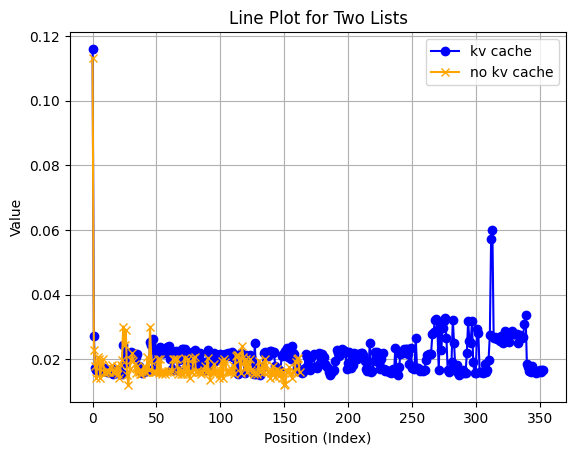

In [20]:
plot_two_lists(token_times_kv_cache, token_times_no_kv_cache, "kv cache", "no kv cache")

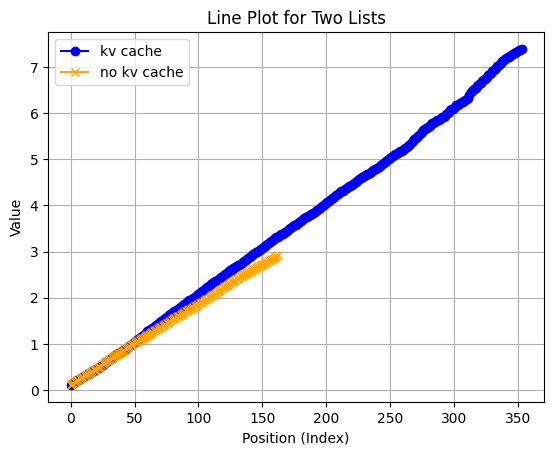

: 

In [ ]:
plot_two_lists(cumulative_sum(token_times_kv_cache), cumulative_sum(token_times_no_kv_cache), "kv cache", "no kv cache")